<a href="https://colab.research.google.com/github/NahianAlindo/ml_practice/blob/master/Competitions/a_fine_windy_day/HackerEarth_ML_a_fine_windy_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Datasets/HackerEarth_ML_a_fine_windy_day/dataset/sample_submission.csv" "/content/"
!cp "/content/drive/MyDrive/Colab Notebooks/Datasets/HackerEarth_ML_a_fine_windy_day/dataset/train.csv" "/content/"
!cp "/content/drive/MyDrive/Colab Notebooks/Datasets/HackerEarth_ML_a_fine_windy_day/dataset/test.csv" "/content/"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import torch
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head(5)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [ ]:
train['cloud_level'].value_counts()

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64

In [ ]:
train['turbine_status'].value_counts()

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
train.head(10)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_8869,2019-01-09 15:23:20,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.479700,-329153.158278,28.504843,NaN,321.985572,1847.508584,43.769679,ABC,NaN,6.869515,0.328413,24.309099,7.238578
1,WM_29162,2019-06-30 11:23:20,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.272190,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,NaN,Low,3.038301,0.451247,31.804122,4.360811
2,WM_29015,2019-06-29 10:23:20,17.358748,4.304503,16.893688,-99.000000,13.397326,11.227171,768.696837,38.196711,117851.203078,23.662236,11.064195,208.560316,1228.831866,14.230847,D,Medium,1.364553,0.377123,35.310427,5.601710
3,WM_3610,2018-11-30 06:13:20,94.338821,27.304846,45.550025,5.623019,47.972591,45.080060,2766.917495,93.570491,19241.824126,44.994738,43.772703,158.947971,1957.726849,44.119966,AB,Low,-99.000000,0.439570,33.619525,9.366244
4,WM_24893,2019-05-28 20:43:20,34.979976,12.461822,47.043384,-0.210978,42.963712,42.617467,927.043818,42.746898,122399.504512,28.989658,NaN,250.062771,1413.577537,15.822185,BA,Medium,NaN,0.476917,12.609321,8.425052
5,WM_27497,2019-06-18 06:43:20,16.234411,-99.000000,41.639573,-1.094376,45.338163,42.977208,758.343996,38.904976,122274.740068,21.231153,41.606901,288.667153,1229.468378,12.466684,A2,Medium,3.434894,0.363449,24.314212,5.687186
6,WM_39537,2019-09-17 07:33:20,92.154897,20.686735,44.795771,1.768495,42.995108,43.535286,2120.698256,70.473164,17041.765650,32.032866,41.370386,276.569435,1675.917495,37.940564,D,Medium,NaN,0.321897,25.726024,3.197428
7,WM_22095,2019-05-08 03:13:20,93.008292,19.788374,43.068709,-0.722893,41.105666,43.809125,2105.895394,71.955170,NaN,29.066114,-99.000000,264.548810,1723.150259,36.097540,BD,Medium,2.252550,0.363856,26.709064,5.199139
8,WM_18482,2019-03-27 10:53:20,94.071984,-99.000000,40.400341,84.372544,41.080128,40.504621,1002.731308,68.795426,16799.964006,30.952525,43.479182,266.746933,1661.239391,21.141816,BBB,Low,NaN,0.293085,13.327612,1.849435
9,WM_37727,2019-09-04 05:13:20,93.632012,-99.000000,42.162586,0.519547,42.068108,44.160711,2025.143101,70.769958,16936.291718,35.071147,42.995213,254.134478,629.853258,34.996507,D,Low,4.970618,0.345104,26.139831,4.597147


In [ ]:
train['turbine_status'].fillna("BB", inplace=True)
train['cloud_level'].fillna("Low",inplace=True)

In [ ]:
train.head(5)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_8869,2019-01-09 15:23:20,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.479700,-329153.158278,28.504843,NaN,321.985572,1847.508584,43.769679,ABC,Low,6.869515,0.328413,24.309099,7.238578
1,WM_29162,2019-06-30 11:23:20,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.272190,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,BB,Low,3.038301,0.451247,31.804122,4.360811
2,WM_29015,2019-06-29 10:23:20,17.358748,4.304503,16.893688,-99.000000,13.397326,11.227171,768.696837,38.196711,117851.203078,23.662236,11.064195,208.560316,1228.831866,14.230847,D,Medium,1.364553,0.377123,35.310427,5.601710
3,WM_3610,2018-11-30 06:13:20,94.338821,27.304846,45.550025,5.623019,47.972591,45.080060,2766.917495,93.570491,19241.824126,44.994738,43.772703,158.947971,1957.726849,44.119966,AB,Low,-99.000000,0.439570,33.619525,9.366244
4,WM_24893,2019-05-28 20:43:20,34.979976,12.461822,47.043384,-0.210978,42.963712,42.617467,927.043818,42.746898,122399.504512,28.989658,NaN,250.062771,1413.577537,15.822185,BA,Medium,NaN,0.476917,12.609321,8.425052


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [ ]:
train.keys()

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [ ]:
for col in train.keys():
    if train.dtypes[col] == np.float64:
        mean_value = train[col].mean()
        train[col].fillna(value=mean_value, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 28200 non-null  float64
 3   atmospheric_temperature(°C)     28200 non-null  float64
 4   shaft_temperature(°C)           28200 non-null  float64
 5   blades_angle(°)                 28200 non-null  float64
 6   gearbox_temperature(°C)         28200 non-null  float64
 7   engine_temperature(°C)          28200 non-null  float64
 8   motor_torque(N-m)               28200 non-null  float64
 9   generator_temperature(°C)       28200 non-null  float64
 10  atmospheric_pressure(Pascal)    28200 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['turbine_status_encoded'] = encoder.fit_transform(train['turbine_status'])
train['cloud_level_encoded'] = encoder.fit_transform(train['cloud_level'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 28200 non-null  float64
 3   atmospheric_temperature(°C)     28200 non-null  float64
 4   shaft_temperature(°C)           28200 non-null  float64
 5   blades_angle(°)                 28200 non-null  float64
 6   gearbox_temperature(°C)         28200 non-null  float64
 7   engine_temperature(°C)          28200 non-null  float64
 8   motor_torque(N-m)               28200 non-null  float64
 9   generator_temperature(°C)       28200 non-null  float64
 10  atmospheric_pressure(Pascal)    28200 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [ ]:
train.head(5)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_encoded,cloud_level_encoded
0,WM_8869,2019-01-09 15:23:20,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.479700,-329153.158278,28.504843,20.799761,321.985572,1847.508584,43.769679,ABC,Low,6.869515,0.328413,24.309099,7.238578,4,1
1,WM_29162,2019-06-30 11:23:20,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.272190,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,BB,Low,3.038301,0.451247,31.804122,4.360811,9,1
2,WM_29015,2019-06-29 10:23:20,17.358748,4.304503,16.893688,-99.000000,13.397326,11.227171,768.696837,38.196711,117851.203078,23.662236,11.064195,208.560316,1228.831866,14.230847,D,Medium,1.364553,0.377123,35.310427,5.601710,13,2
3,WM_3610,2018-11-30 06:13:20,94.338821,27.304846,45.550025,5.623019,47.972591,45.080060,2766.917495,93.570491,19241.824126,44.994738,43.772703,158.947971,1957.726849,44.119966,AB,Low,-99.000000,0.439570,33.619525,9.366244,3,1
4,WM_24893,2019-05-28 20:43:20,34.979976,12.461822,47.043384,-0.210978,42.963712,42.617467,927.043818,42.746898,122399.504512,28.989658,20.799761,250.062771,1413.577537,15.822185,BA,Medium,2.254034,0.476917,12.609321,8.425052,8,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4dfe19f10>,
      dtype=object)

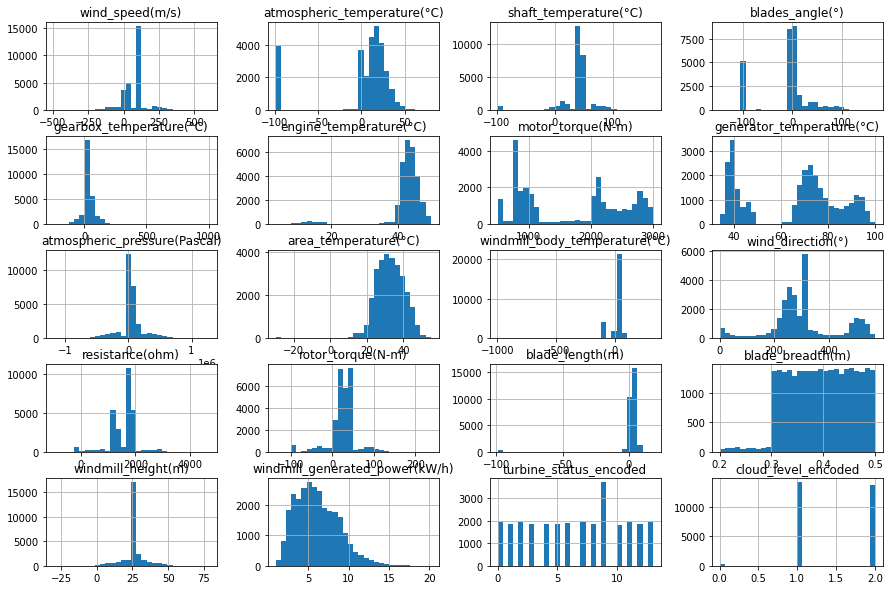

In [ ]:
train.hist(bins=30, figsize=(15, 10))

In [ ]:
df = pd.concat([train['tracking_id'], train['datetime']], axis=1)

In [ ]:
df

,tracking_id,datetime
0,WM_8869,2019-01-09 15:23:20
1,WM_29162,2019-06-30 11:23:20
2,WM_29015,2019-06-29 10:23:20
3,WM_3610,2018-11-30 06:13:20
4,WM_24893,2019-05-28 20:43:20
...,...,...
28195,WM_14621,2019-02-21 17:43:20
28196,WM_26626,2019-06-11 20:23:20
28197,WM_13611,2019-02-14 04:23:20
28198,WM_26202,2019-06-08 20:13:20


In [ ]:
train.drop(columns=['tracking_id', 'datetime'], inplace=True)

In [ ]:
train.drop(columns=['turbine_status', 'cloud_level'], inplace=True)

In [ ]:
train.head(5)

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_encoded,cloud_level_encoded
0,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.479700,-329153.158278,28.504843,20.799761,321.985572,1847.508584,43.769679,6.869515,0.328413,24.309099,7.238578,4,1
1,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.272190,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,3.038301,0.451247,31.804122,4.360811,9,1
2,17.358748,4.304503,16.893688,-99.000000,13.397326,11.227171,768.696837,38.196711,117851.203078,23.662236,11.064195,208.560316,1228.831866,14.230847,1.364553,0.377123,35.310427,5.601710,13,2
3,94.338821,27.304846,45.550025,5.623019,47.972591,45.080060,2766.917495,93.570491,19241.824126,44.994738,43.772703,158.947971,1957.726849,44.119966,-99.000000,0.439570,33.619525,9.366244,3,1
4,34.979976,12.461822,47.043384,-0.210978,42.963712,42.617467,927.043818,42.746898,122399.504512,28.989658,20.799761,250.062771,1413.577537,15.822185,2.254034,0.476917,12.609321,8.425052,8,2


In [ ]:
train[:2:1]

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_encoded,cloud_level_encoded
0,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.47970,-329153.158278,28.504843,20.799761,321.985572,1847.508584,43.769679,6.869515,0.328413,24.309099,7.238578,4,1
1,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.27219,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,3.038301,0.451247,31.804122,4.360811,9,1


In [ ]:
train.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_encoded,cloud_level_encoded
wind_speed(m/s),1.000000,0.048803,0.038312,-0.003561,0.016169,0.153978,0.375787,0.425292,-0.114828,0.197517,0.026672,0.041446,0.235377,0.150803,0.006298,0.003884,-0.011762,0.062246,0.007288,-0.000794
atmospheric_temperature(°C),0.048803,1.000000,0.011277,0.006953,0.005603,0.047454,0.089491,0.110161,-0.020951,0.068143,0.007483,0.015378,0.057722,0.040943,0.000491,0.003494,0.001178,-0.000941,-0.004684,-0.007778
shaft_temperature(°C),0.038312,0.011277,1.000000,-0.009652,0.029967,0.203879,0.071273,0.074638,-0.017856,0.087567,0.017385,0.018197,0.032218,0.027619,0.000131,-0.006120,-0.008723,0.046366,-0.002281,-0.005291
blades_angle(°),-0.003561,0.006953,-0.009652,1.000000,-0.025123,-0.064518,-0.137941,-0.044154,0.008840,-0.075710,0.003109,-0.024899,-0.033286,-0.047810,-0.008339,-0.061041,0.002681,-0.153607,0.006559,-0.053710
gearbox_temperature(°C),0.016169,0.005603,0.029967,-0.025123,1.000000,0.132720,0.045035,0.045116,-0.008112,0.058874,0.016401,0.026152,0.021098,0.016505,-0.002439,0.011283,0.003809,0.053017,0.008072,0.000756
engine_temperature(°C),0.153978,0.047454,0.203879,-0.064518,0.132720,1.000000,0.352092,0.360605,-0.058208,0.337794,0.085820,0.130353,0.208218,0.137072,-0.006539,0.011557,-0.011842,0.271819,-0.006510,0.007711
motor_torque(N-m),0.375787,0.089491,0.071273,-0.137941,0.045035,0.352092,1.000000,0.934699,-0.204314,0.468298,0.026919,0.188840,0.512974,0.386558,0.004545,0.052929,0.001165,0.503155,-0.004038,0.033062
generator_temperature(°C),0.425292,0.110161,0.074638,-0.044154,0.045116,0.360605,0.934699,1.000000,-0.226918,0.510495,0.034789,0.188868,0.539177,0.368145,0.004852,0.017568,-0.000631,0.390092,-0.002037,0.007054
atmospheric_pressure(Pascal),-0.114828,-0.020951,-0.017856,0.008840,-0.008112,-0.058208,-0.204314,-0.226918,1.000000,-0.085689,-0.008206,-0.024649,-0.121763,-0.088024,0.004657,0.004775,0.002616,-0.012578,0.005330,0.001192
area_temperature(°C),0.197517,0.068143,0.087567,-0.075710,0.058874,0.337794,0.468298,0.510495,-0.085689,1.000000,0.048667,0.177423,0.266360,0.182864,0.000068,0.022397,-0.005254,0.383173,-0.009810,0.001267


(20, 20)


[Text(0.5, 0, 'wind_speed(m/s)'),
 Text(1.5, 0, 'atmospheric_temperature(°C)'),
 Text(2.5, 0, 'shaft_temperature(°C)'),
 Text(3.5, 0, 'blades_angle(°)'),
 Text(4.5, 0, 'gearbox_temperature(°C)'),
 Text(5.5, 0, 'engine_temperature(°C)'),
 Text(6.5, 0, 'motor_torque(N-m)'),
 Text(7.5, 0, 'generator_temperature(°C)'),
 Text(8.5, 0, 'atmospheric_pressure(Pascal)'),
 Text(9.5, 0, 'area_temperature(°C)'),
 Text(10.5, 0, 'windmill_body_temperature(°C)'),
 Text(11.5, 0, 'wind_direction(°)'),
 Text(12.5, 0, 'resistance(ohm)'),
 Text(13.5, 0, 'rotor_torque(N-m)'),
 Text(14.5, 0, 'blade_length(m)'),
 Text(15.5, 0, 'blade_breadth(m)'),
 Text(16.5, 0, 'windmill_height(m)'),
 Text(17.5, 0, 'windmill_generated_power(kW/h)'),
 Text(18.5, 0, 'turbine_status_encoded'),
 Text(19.5, 0, 'cloud_level_encoded')]

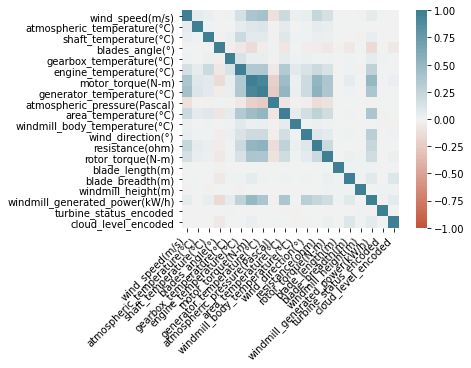

In [ ]:
corr = train.corr()
print(corr.shape)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
sorted = corr['windmill_generated_power(kW/h)'].sort_values()
print(sorted)

blades_angle(°)                  -0.154808
atmospheric_pressure(Pascal)     -0.013310
atmospheric_temperature(°C)      -0.001005
windmill_body_temperature(°C)     0.003196
windmill_height(m)                0.003909
blade_length(m)                   0.014294
shaft_temperature(°C)             0.046552
gearbox_temperature(°C)           0.053192
wind_speed(m/s)                   0.062754
blade_breadth(m)                  0.085886
rotor_torque(N-m)                 0.187476
resistance(ohm)                   0.240045
engine_temperature(°C)            0.272597
wind_direction(°)                 0.359647
area_temperature(°C)              0.384564
generator_temperature(°C)         0.391820
motor_torque(N-m)                 0.505553
windmill_generated_power(kW/h)    1.000000
Name: windmill_generated_power(kW/h), dtype: float64


In [ ]:
x_train = train.drop(labels='windmill_generated_power(kW/h)', axis=1)
y_train = train['windmill_generated_power(kW/h)']

In [ ]:
x_train

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_encoded,cloud_level_encoded
0,92.789558,29.113114,44.155769,-0.549538,45.752393,46.480430,2656.829649,79.479700,-329153.158278,28.504843,20.799761,321.985572,1847.508584,43.769679,6.869515,0.328413,24.309099,4,1
1,93.164312,17.473470,43.962244,-99.000000,0.517880,40.022104,2129.900490,70.272190,16524.096524,19.419041,82.082374,252.964645,-99.000000,35.611324,3.038301,0.451247,31.804122,9,1
2,17.358748,4.304503,16.893688,-99.000000,13.397326,11.227171,768.696837,38.196711,117851.203078,23.662236,11.064195,208.560316,1228.831866,14.230847,1.364553,0.377123,35.310427,13,2
3,94.338821,27.304846,45.550025,5.623019,47.972591,45.080060,2766.917495,93.570491,19241.824126,44.994738,43.772703,158.947971,1957.726849,44.119966,-99.000000,0.439570,33.619525,3,1
4,34.979976,12.461822,47.043384,-0.210978,42.963712,42.617467,927.043818,42.746898,122399.504512,28.989658,20.799761,250.062771,1413.577537,15.822185,2.254034,0.476917,12.609321,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,-134.076346,-99.000000,45.881207,11.586008,44.164485,44.510356,2743.692408,93.491354,18996.316726,34.593828,-99.000000,536.869625,1956.929859,49.451330,2.337895,0.385199,27.754372,7,1
28196,26.170908,14.430886,42.564996,-1.191669,42.603246,45.016055,838.797373,39.212880,53185.064883,24.880780,40.985851,255.919456,1313.598141,14.660108,2.229985,0.441007,15.870564,6,2
28197,36.893899,0.383727,42.040593,-1.378108,42.302729,48.078554,960.217394,43.318933,125074.137080,21.044496,-99.000000,513.672816,1420.886613,17.490260,4.357955,0.314166,26.995929,2,2
28198,92.155201,21.777043,43.111080,-1.158908,41.427257,41.616768,2239.793856,76.201352,16724.956362,29.283590,20.799761,257.423144,1756.651892,-6.916872,3.615376,0.429686,27.176225,12,2


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()
robust_df = scaler.fit_transform(x_train)

In [ ]:
x_train.keys()

Index(['wind_speed(m/s)', 'atmospheric_temperature(°C)',
       'shaft_temperature(°C)', 'blades_angle(°)', 'gearbox_temperature(°C)',
       'engine_temperature(°C)', 'motor_torque(N-m)',
       'generator_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'area_temperature(°C)', 'windmill_body_temperature(°C)',
       'wind_direction(°)', 'resistance(ohm)', 'rotor_torque(N-m)',
       'blade_length(m)', 'blade_breadth(m)', 'windmill_height(m)',
       'turbine_status_encoded', 'cloud_level_encoded'],
      dtype='object')

In [ ]:
robust_df = pd.DataFrame(robust_df, columns=x_train.keys()[:])

In [ ]:
robust_df

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_encoded,cloud_level_encoded
0,-0.006308,0.674243,0.116303,-0.003289,0.475619,0.906458,0.393033,0.232058,-3.495403,-0.375465,-0.922207,0.372631,0.301793,0.444263,2.008032,-0.688632,-0.533274,-0.428571,0.0
1,-0.001244,0.149736,0.068406,-14.973036,-8.025162,-1.073713,0.061953,-0.011921,-0.022394,-1.207441,1.682732,-0.434325,-3.168517,0.147676,-0.005627,0.516689,1.980400,0.285714,0.0
2,-1.025684,-0.443686,-6.631007,-14.973036,-5.604768,-9.902457,-0.793320,-0.861854,0.995636,-0.818897,-1.336037,-0.953477,-0.801208,-0.629584,-0.885337,-0.210656,3.156342,0.857143,1.0
3,0.014628,0.592758,0.461379,0.935271,0.892854,0.477094,0.462204,0.605435,0.004911,1.134496,0.054303,-1.533519,0.498294,0.456997,-53.636256,0.402115,2.589249,-0.571429,0.0
4,-0.787550,-0.076100,0.830982,0.048191,-0.048449,-0.277955,-0.693827,-0.741283,1.041333,-0.331071,-0.922207,-0.468253,-0.471836,-0.571733,-0.417832,0.768583,-4.457136,0.142857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,-3.072184,-5.098807,0.543346,1.841965,0.177208,0.302419,0.447611,0.603338,0.002444,0.182097,-6.014534,2.884942,0.496873,0.650812,-0.373756,-0.131415,0.622198,0.000000,0.0
28196,-0.906596,0.012630,-0.277410,-0.100927,-0.116190,0.457470,-0.749275,-0.834927,0.345938,-0.707316,-0.064158,-0.399779,-0.650083,-0.613979,-0.430472,0.416211,-3.363383,-0.142857,1.0
28197,-0.761685,-0.620365,-0.407198,-0.129276,-0.172666,1.396455,-0.672984,-0.726126,1.068205,-1.058600,-6.014534,2.613737,-0.458805,-0.511092,0.687974,-0.828429,0.367833,-0.714286,1.0
28198,-0.014881,0.343664,-0.142255,-0.095945,-0.337190,-0.584777,0.131001,0.145189,-0.020376,-0.304156,-0.922207,-0.382199,0.139810,-1.398383,0.297680,0.305122,0.428300,0.714286,1.0


In [ ]:
scaler = StandardScaler()
robust_df = scaler.fit_transform(robust_df)

In [ ]:
robust_df = pd.DataFrame(robust_df, columns=x_train.keys()[:])

In [ ]:
robust_df

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_encoded,cloud_level_encoded
0,0.312927,0.692594,0.149630,0.190736,0.108209,0.631407,1.144129,0.729452,-2.144671,-0.549151,1.104418e-15,1.244377e-01,0.562680,0.558373,4.522091e-01,-1.125555,-0.204975,-0.670386,-0.913809
1,0.317864,0.411991,0.142516,-1.871769,-0.927805,-0.423335,0.506847,0.264706,-0.205644,-1.728627,1.177872e+00,-4.444821e-01,-3.464780,0.304162,7.683979e-02,0.882934,0.768624,0.593040,-0.913809
2,-0.680836,0.094520,-0.852543,-1.871769,-0.632825,-5.125981,-1.139428,-1.354292,0.362735,-1.177795,-1.871209e-01,-8.104943e-01,-0.717404,-0.362045,-8.714833e-02,-0.329079,1.224091,1.603780,1.008564
3,0.333338,0.649001,0.200884,0.320049,0.159059,0.402706,1.277272,1.440679,-0.190400,1.591489,4.415477e-01,-1.219435e+00,0.790729,0.569288,-9.920527e+00,0.692013,1.004444,-0.923072,-0.913809
4,-0.448685,0.291173,0.255781,0.197829,0.044340,0.000527,-0.947919,-1.124623,0.388248,-0.486214,1.104418e-15,-4.684014e-01,-0.335153,-0.312459,1.138271e-16,1.302677,-1.724769,0.340354,1.008564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,-2.675919,-2.395895,0.213058,0.444972,0.071841,0.309664,1.249183,1.436685,-0.191777,0.241292,-2.302592e+00,1.895666e+00,0.789080,0.735411,8.216421e-03,-0.197035,0.242564,0.087669,-0.913809
28196,-0.564740,0.338642,0.091152,0.177284,0.036084,0.392253,-1.054646,-1.303002,0.000000,-1.019610,3.879834e-01,-4.201264e-01,-0.542017,-0.348669,-2.356253e-03,0.715502,-1.301136,-0.165016,1.008564
28197,-0.423470,0.000000,0.071875,0.173378,0.029201,0.892405,-0.907798,-1.095750,0.403251,-1.517618,-2.302592e+00,1.704461e+00,-0.320030,-0.260483,2.061351e-01,-1.358505,0.144043,-1.175757,1.008564
28198,0.304570,0.515740,0.111227,0.177970,0.009150,-0.162902,0.639755,0.563978,-0.204518,-0.448058,1.104418e-15,-4.077319e-01,0.374692,-1.020999,1.333797e-01,0.530390,0.167463,1.351095,1.008564


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train)

In [ ]:
model = xgboost.XGBRegressor(objective='reg:squarederror')

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_test_pred, y_test)

y_pred = model.predict(X_test)

In [ ]:
mse

0.44129843700005505

In [ ]:
x_train = train.drop(labels='windmill_generated_power(kW/h)', axis=1)
y_train = train['windmill_generated_power(kW/h)']

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,NaN,Medium,3.286975,0.407771,20.888674
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [ ]:
test_info = pd.concat([test['tracking_id'], test['datetime']], axis=1)

In [ ]:
test_info.head()

,tracking_id,datetime
0,WM_19817,2019-04-17 08:53:20
1,WM_18723,2019-03-30 07:43:20
2,WM_34552,2019-08-10 11:33:20
3,WM_28570,2019-06-26 03:53:20
4,WM_36934,2019-08-27 16:43:20


In [ ]:
test['cloud_level'].value_counts()

Low              5932
Medium           5893
Extremely Low     136
Name: cloud_level, dtype: int64

In [ ]:
test['turbine_status'].value_counts()

BB     871
B2     859
A      852
BBB    813
BCB    811
BA     809
AB     804
A2     796
BD     787
ABC    787
D      786
AC     778
AAA    773
B      763
Name: turbine_status, dtype: int64

In [ ]:
test['turbine_status'].fillna("BB", inplace=True)
test['cloud_level'].fillna("Low",inplace=True)

In [ ]:
test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,BB,Medium,3.286975,0.407771,20.888674
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364


In [ ]:
for col in train.keys():
    if train.dtypes[col] == np.float64:
        mean_value = train[col].mean()
        train[col].fillna(value=mean_value, inplace=True)

In [ ]:
pd.DataFrame(y_pred).to_csv('competitionsubmission.csv',index=False)

In [ ]:
test['turbine_status_encoded'] = encoder.fit_transform(test['turbine_status'])
test['cloud_level_encoded'] = encoder.fit_transform(test['cloud_level'])

In [ ]:
test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_encoded,cloud_level_encoded
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431,8,2
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823,0,2
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677,7,2
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426,10,1
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,BB,Medium,3.286975,0.407771,20.888674,9,2
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606,3,1
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451,8,1
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364,0,2


In [ ]:
x_test = test.drop(columns=['tracking_id','datetime', 'turbine_status', 'cloud_level'])

In [ ]:
x_test

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_encoded,cloud_level_encoded
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,3.185837,0.403965,25.572431,8,2
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,3.016603,0.444755,24.371823,0,2
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,2.611941,0.387368,27.654677,7,2
3,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,2.866805,0.450478,24.189426,10,1
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,3.549672,0.368355,4.885440,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,3.286975,0.407771,20.888674,9,2
12082,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,NaN,0.367823,24.793606,3,1
12083,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,3.728375,0.459887,5.653451,8,1
12084,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,2.247676,0.394680,24.591364,0,2


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()
robust_df = scaler.fit_transform(x_test)

In [ ]:
robust_df = pd.DataFrame(robust_df, columns=x_test.keys()[:])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_final = pd.Series(y_pred)

In [ ]:
df = pd.concat([test['tracking_id'], test['datetime'], y_pred_final], axis=1)

In [ ]:
df['windmill_generated_power(kW/h)'] = y_pred_final

In [ ]:
df.drop(columns=0,inplace=True)

In [ ]:
df

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.585734
1,WM_18723,2019-03-30 07:43:20,2.874216
2,WM_34552,2019-08-10 11:33:20,3.039895
3,WM_28570,2019-06-26 03:53:20,7.099610
4,WM_36934,2019-08-27 16:43:20,3.986666
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.812917
12082,WM_1630,2018-11-12 17:33:20,3.599674
12083,WM_24703,2019-05-27 11:53:20,5.168839
12084,WM_22893,2019-05-13 21:53:20,4.954848


In [ ]:
df.to_csv('/content/submission.csv', index=False)